In [379]:
import pickle
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [380]:
infile = open('Vision_task_dataset_public/train_image.pkl','rb')
x_data = np.asarray(pickle.load(infile))
infile.close()

In [381]:
infile = open('Vision_task_dataset_public/train_label.pkl','rb')
y_data = np.asarray(pickle.load(infile))
infile.close()

In [382]:
print(x_data.shape, y_data.shape)

(8000, 784) (8000,)


In [383]:
x_data=x_data.reshape(-1,28,28)
print(x_data.shape, y_data.shape)

(8000, 28, 28) (8000,)


In [384]:
set(y_data)

{0, 2, 3, 6}

In [385]:
#split into test train
from sklearn.model_selection import train_test_split

In [386]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.1,random_state=101)

In [387]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7200, 28, 28) (7200,)
(800, 28, 28) (800,)


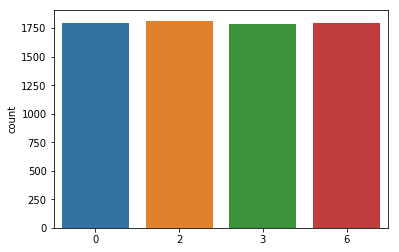

In [388]:
sns.countplot(y_train)  # plotting distribution of all classes

6


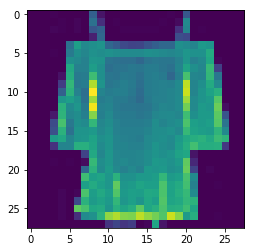

In [389]:
#plotting some random images
plt.imshow(X_train[2000])
print(y_train[2000])

3


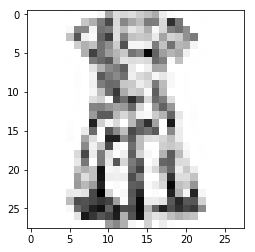

In [390]:
#plotting some random images
plt.imshow(X_train[6258],cmap='Greys')
print(y_train[6258])

0


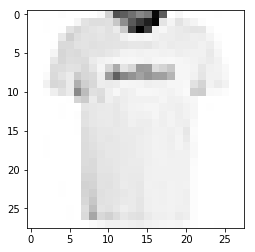

In [391]:
#plotting some random images
plt.imshow(X_train[1],cmap='Greys')
print(y_train[1])

In [392]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape) 

(7200, 28, 28)
(7200,)
(800, 28, 28)
(800,)


In [393]:
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (7200, 28, 28)
Number of images in X_train 7200
Number of images in X_test 800


In [394]:
# Further break training data into train / validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.1,random_state=41)

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_valid = X_valid.reshape(X_valid.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

# One-hot encode the labels

y_train = tf.keras.utils.to_categorical(y_train, 7) # i have take 7 as size of one-hot encoding vector because max label value is 6 which can fit if we take array size of 7
y_valid = tf.keras.utils.to_categorical(y_valid, 7)
y_test = tf.keras.utils.to_categorical(y_test, 7)

# Print training set shape
print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(X_train.shape[0], 'train set')
print(X_valid.shape[0], 'validation set')
print(X_test.shape[0], 'test set')

x_train shape: (6480, 28, 28, 1) y_train shape: (6480, 7)
6480 train set
720 validation set
800 test set


In [395]:
# Importing the required Keras modules containing model and layers
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [396]:
# Creating a Sequential Model and adding the layers
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(7, activation='softmax'))
# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)              0         
__________

### compile and fitting the model on 20 epochs

In [397]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,
         y_train,
         batch_size=32,
         epochs=20,
         validation_data=(X_valid, y_valid))

Train on 6480 samples, validate on 720 samples
Epoch 1/20
6480/6480 [==============================] - 4s 617us/step - loss: 0.7986 - acc: 0.6696 - val_loss: 0.6367 - val_acc: 0.7292
Epoch 2/20
6480/6480 [==============================] - 2s 293us/step - loss: 0.6286 - acc: 0.7403 - val_loss: 0.5270 - val_acc: 0.7833
Epoch 3/20
6480/6480 [==============================] - 2s 334us/step - loss: 0.5484 - acc: 0.7787 - val_loss: 0.4677 - val_acc: 0.8028
Epoch 4/20
6480/6480 [==============================] - 2s 283us/step - loss: 0.5022 - acc: 0.8026 - val_loss: 0.4710 - val_acc: 0.7972
Epoch 5/20
6480/6480 [==============================] - 2s 294us/step - loss: 0.4718 - acc: 0.8187 - val_loss: 0.4467 - val_acc: 0.8097
Epoch 6/20
6480/6480 [==============================] - 2s 356us/step - loss: 0.4526 - acc: 0.8182 - val_loss: 0.4420 - val_acc: 0.8167
Epoch 7/20
6480/6480 [==============================] - 2s 363us/step - loss: 0.4298 - acc: 0.8332 - val_loss: 0.4010 - val_acc: 0.8333
E

### testing accuracy on train, validation and test sets

In [398]:
print("Accuracy on training set",model.evaluate(X_train, y_train)[1])
print("Accuracy on validation set",model.evaluate(X_valid, y_valid)[1])
print("Accuracy on test set",model.evaluate(X_test, y_test)[1])

6480/6480 [==============================] - 1s 82us/step
Accuracy on training set 0.9239197530864197
720/720 [==============================] - 0s 85us/step
Accuracy on validation set 0.8722222222222222
800/800 [==============================] - 0s 79us/step
Accuracy on test set 0.89


### checking randomly prediction results with photo af apparel

0


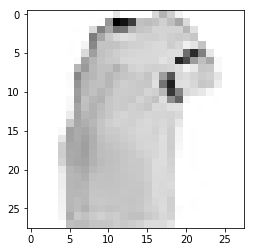

In [399]:
image_index = 320
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

### plotting 15 figures with predicted and actual results (red labelled images are showing wrong results)

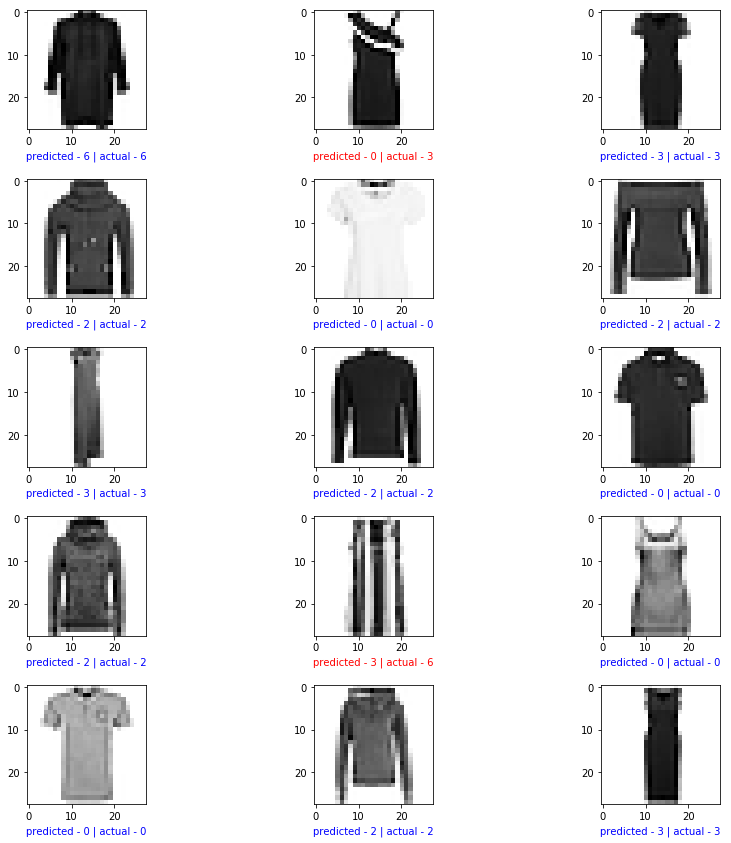

In [400]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
predictions = model.predict(X_test)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(15,15))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(X_test[i].reshape(28, 28),cmap='Greys')
    if predictions[i].argmax()==y_test[i].argmax():
        plt.xlabel("predicted - {} | actual - {}".format(predictions[i].argmax(),y_test[i].argmax()),color="blue")
    else:
        plt.xlabel("predicted - {} | actual - {}".format(predictions[i].argmax(),y_test[i].argmax()),color="red")

plt.show()

### As we can see there is overfitting in the model we can improve it using data augmentation

## Now predicting classes for test_image.pkl file and writing it into csv

In [401]:
infile = open('Vision_task_dataset_public/test_image.pkl','rb')
x_test_data = np.asarray(pickle.load(infile))
infile.close()

In [402]:
x_test_data=x_test_data.reshape(-1,28,28)
print(data.shape)

(2000, 28, 28)


In [403]:
# Making sure that the values are float so that we can get decimal points after division
x_test_data = x_test_data.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_test_data /= 255.0

In [404]:
x_test_data = x_test_data.reshape(x_test_data.shape[0], 28, 28, 1)

In [405]:
prediction=model.predict(x_test_data)

In [406]:
import csv
  
myFile = open('kartik_tyagi.csv', 'w',newline='')
with myFile:
    writer = csv.writer(myFile)
    writer.writerow(['image_index','class'])
    for i in range(len(prediction)):
        writer.writerow([i,prediction[i].argmax()])
     
    print("Writing complete")

Writing complete
